In [3]:
import tensorflow as tf 
from tensorflow.keras import models,layers,datasets
BatchSize = 100

def load_image(img_path,size = (32,32)):
    label = tf.constant(1,tf.int8) if tf.strings.regex_full_match(img_path,".*automobile.*")  else tf.constant(0,tf.int8)
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img,size)/255.0
    return (img,label)


In [5]:
ds_train = tf.data.Dataset.list_files("D:\Code\eatTF\eat_tensorflow2_in_30_days/data/cifar2/train/*/*.jpg").map(load_image,num_parallel_calls = tf.data.experimental.AUTOTUNE) .shuffle(buffer_size = 1000).batch(BatchSize).prefetch(tf.data.experimental.AUTOTUNE)  

In [8]:
ds_test = tf.data.Dataset.list_files("./data/cifar2/test/*/*.jpg") \
           .map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE) \
           .batch(BatchSize) \
           .prefetch(tf.data.experimental.AUTOTUNE) 

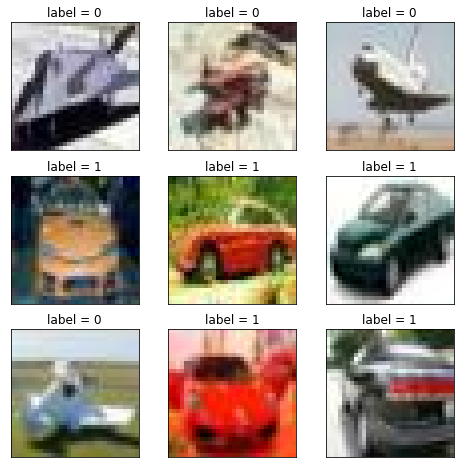

In [9]:
#查看部分样本
from matplotlib import pyplot as plt 

plt.figure(figsize=(8,8)) 
for i,(img,label) in enumerate(ds_train.unbatch().take(9)):
    ax=plt.subplot(3,3,i+1)
    ax.imshow(img.numpy())
    ax.set_title("label = %d"%label)
    ax.set_xticks([])
    ax.set_yticks([]) 
plt.show()

In [11]:
for x,y in ds_train.take(1):
    print(x.shape,y.shape)

(100, 32, 32, 3) (100,)


In [12]:
inputs = layers.Input(shape=(32,32,3))
x = layers.Conv2D(32,kernel_size=(3,3))(inputs)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(64,kernel_size=(5,5))(x)
x = layers.MaxPool2D()(x)
x = layers.Dropout(rate=0.1)(x)
x = layers.Flatten()(x)
x = layers.Dense(32,activation='relu')(x)
outputs = layers.Dense(1,activation = 'sigmoid')(x)

model = models.Model(inputs = inputs,outputs = outputs)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)             

In [13]:
import datetime
import os

stamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join('data', 'autograph', stamp)

tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.binary_crossentropy,
        metrics=["accuracy"]
    )

history = model.fit(ds_train,epochs= 10,validation_data=ds_test,
                    callbacks = [tensorboard_callback],workers = 4)

Epoch 1/10
  1/100 [..............................] - ETA: 0s - loss: 0.7202 - accuracy: 0.4900WARNING:tensorflow:From D:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
100/100 [==============================] - 65s 654ms/step - loss: 0.4506 - accuracy: 0.7821 - val_loss: 0.3419 - val_accuracy: 0.8555
Epoch 2/10
100/100 [==============================] - 20s 196ms/step - loss: 0.3380 - accuracy: 0.8515 - val_loss: 0.2709 - val_accuracy: 0.8855
Epoch 3/10
100/100 [==============================] - 21s 212ms/step - loss: 0.2715 - accuracy: 0.8877 - val_loss: 0.2297 - val_accuracy: 0.9050
Epoch 4/10
100/100 [==============================] - 20s 202ms/step - loss: 0.2257 - accuracy: 0.9105 - val_loss: 0.1994 - val_accuracy: 0.9225
Epoch 5/10
100/100 [==============================] 

In [17]:
from tensorboard import notebook
notebook.list() 
notebook.start("--logdir ./data/keras_model/autograph")

Known TensorBoard instances:
  - port 6006: logdir ./data/keras_model/autograph (started 0:01:07 ago; pid 6272)
  - port 6006: logdir ./data/keras_model (started 0:15:10 ago; pid 9044)


Reusing TensorBoard on port 6006 (pid 6272), started 0:01:07 ago. (Use '!kill 6272' to kill it.)